In [123]:
#In this notebook, we are using the california housing prices dataset from the StatLib repository. 
#The dataset is based on the data from the 1990 California census.

#Our model should learn from the data and be able to predict the median housing price in any district (block), given all the other metrics.

## Ultimate goal: The system should determine whether it is worth investing in a given area or not. 

In [124]:
#Let's write a function that fetches the data for us:

#This functin will craete a datasets/housing directory in our workspace and will download the housing.tgz file, and will extract the housing.csv file from
#it in the same directory.

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [125]:
#write a function to load the data in pandas.

import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [126]:
fetch_housing_data()
housing = load_housing_data()

In [127]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [128]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [129]:
housing['ocean_proximity'].value_counts() #let's see what all different kinds of categorical values does this column holds.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [130]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

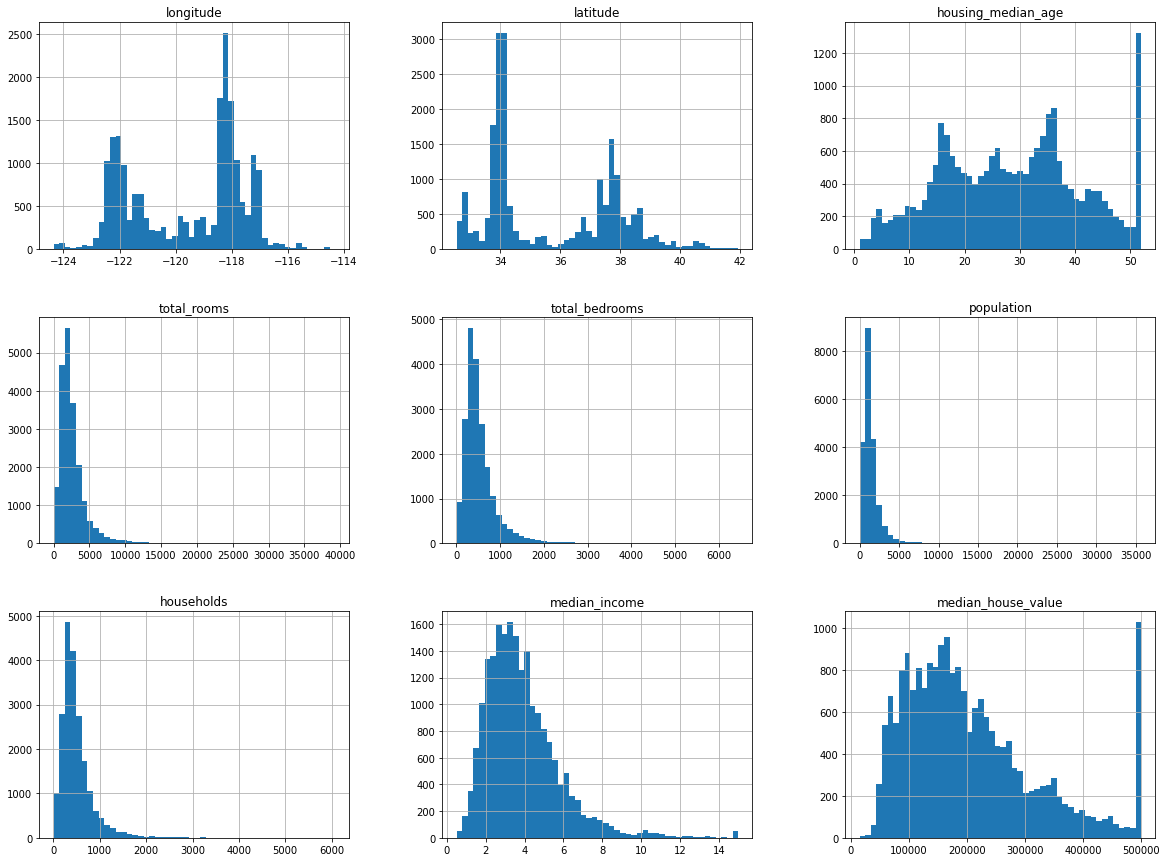

In [131]:
#let's plot a histogram for getting a better insight...

import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [132]:
# Create a test set, and leave it aside.

import numpy as np

#This function will take data and the split ratio, then will return the test data and the training data.

#This function has been commented as this is not a good practice of creating test/training sets, as this will create
#different test sets every time you run this whole program and ultimately your model will get to see the whole dataset which 
#is not a good thing at all.

#Another way is to seed the np.random function which basically shuffles the dataset in the same way everytime you run the program.

#But, what if you want to add some more data to the dataset? 

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

# print("This is the length of the training set: " + str(len(train_set)))
# print("This is the length of the test set: " + str(len(test_set)))

#-----------x--------------x----------------x----------------x--------------x----------------

#If you want to update the dataset then having seed value in the random function is also not a good way.

#To have a stable train/test split even after updating the dataset, a common solutino is to compute a hash of each instance's identifier and put that instance in
#the test ste if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test dataset will remain consistent across 
#multiple runs, even if you refresh the dataset.

#Here's a possible implementation:

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

#For the above approach to work with our dataset of housing list, we need an identifier. Option 1 is to use the index, drawback is that we have to take care that
#all the data gets appended to the current dataset and no row should be deleted at any point, that will mess up the index values.

#Another way is to create the identifier using the lat and long values as they are most likely to be constant.

#-----------x--------------x----------------x----------------x--------------x----------------

#Another efficent way to split the dataset into test/split data is to use the function provided by the scikit learn library in module called 'model_selection'
# called train_test_split(). This function does basically the same thing under the hood (creating an identifier and seeding the values in the test data) along
#with many great functionalitis.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [133]:
train_set, test_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

<AxesSubplot:>

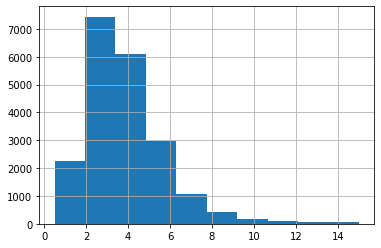

In [134]:
#We are told that the median_income is a very important factor in predicting the house price.

housing['median_income'].hist()

<AxesSubplot:>

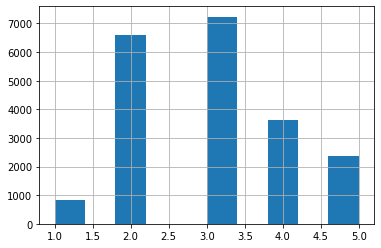

In [135]:
#We need to create different stratas for each income group.
    
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

#Let's plot the income categories:
housing['income_cat'].hist()

In [136]:
#Now we are ready to do stratified sampling based on the income category. For this we can use the scikit-learn's StratifiedShuffleSplit class as follows:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
#split.split gives a generator which has two arrays inside of it.
#For those two arrays, we are using a loop which has two iterators.

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#Let's see if it worked or not:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [137]:
#Remove the income_cat attribute so that the data is back to its original state:

for set_ in (strat_train_set, strat_test_set): #using a loop here because we need to remove the column from both test and train set.
    set_.drop("income_cat", axis = 1, inplace = True)

In [138]:
#Now let's explore the training set and leave the testing set aside:

#Let's make a copy first so we don't end up messing up the original training data:

housing = strat_train_set.copy()

In [139]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   
...           ...         ...            ...                 ...   
6563        573.0       210.0         4.9312            240200.0   
12053      1052.0       258.0         2.0682            113000.0   
13908      2098.0       765.0         3.2723             97800.0   
11159      1356.0       356.0         4.0625            225900.0   
15775      1269.0       639.0         3.5750            500001.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN  
...               ...  
6563           INLAND  
12053          INLAND  
13908          INLAND  
11159       <1H OCEAN  
15775        NEAR BAY  

[16512 rows x 10 columns]

### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

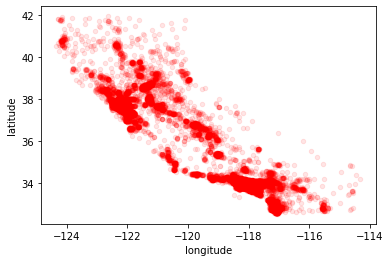

In [143]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, color = 'r')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

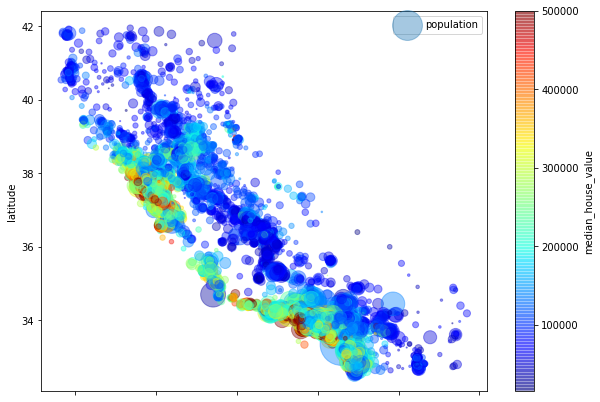

In [155]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population']/20, label = 'population', figsize = (10,7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

#Note that the radius of the circle represents the population density of that district and the color represents the price. (Blue is less, red is more)

#The plot shows us that the areas which are near the ocean and have more population are more expensive.

In [157]:
#Now let's look at the correlations:

corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

In [159]:
#Let's see what is highly correlated with the median_house_value

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

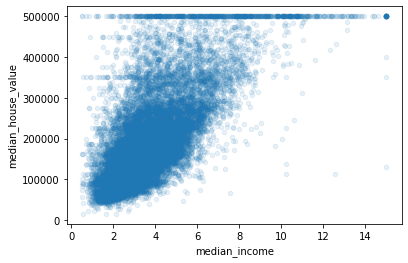

In [161]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

In [164]:
housing['median_house_value'].value_counts()

500001.0    786
137500.0    102
162500.0     91
112500.0     80
187500.0     76
           ... 
498600.0      1
390600.0      1
298800.0      1
428500.0      1
332900.0      1
Name: median_house_value, Length: 3668, dtype: int64

In [166]:
#We will now create new and meaningful attributes.

housing["rooms_per_household"] = housing["total_rooms"] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [167]:
corr_matrix = housing.corr()

In [170]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data for our ML model.

In [172]:
#Separate the predictors and the labels.

housing = strat_train_set.drop("median_house_value", axis = 1) #Note that the drop function does not change the strat_train_set and just makes a new copy with dropped column.
housing_labels = strat_train_set["median_house_value"].copy()

In [178]:
#Let's take care of null values:

#We have three options here:
# 1. Get rid of the corresponding districts.
# 2. Get rid of the whole attribute.
# 3. Set the values to some value (zero, the mean, or the median)

#The scikit-learn library provides a handy class to take care of missing values: SimpleImputer.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") #we are going with the option 3

#Since the median can be found only for the numerical values, we will have to drop the categorical columns (ocean_proximity in this case)
housing_num = housing.drop('ocean_proximity', axis = 1)

#Now, we can fit the imputer instance to the training data using the fit() method.
imputer.fit(housing_num)

imputer.statistics_ #gives the median (or whatever strategy) for each column

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [180]:
#Now you can use this "trained" imputer to transform the training set by replacing missing values with the learned medians:

x = imputer.transform(housing_num) #returns a numpy array.

#Convert np array to pd df:

housing_tr = pd.DataFrame(x, columns = housing_num.columns, index = housing_num.index)


In [181]:
housing_tr.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936           1
-121.21    37.81     8.0                 1883.0       298.0           999.0       301.0       5.1930           1
-121.19    38.66     26.0                1937.0       286.0           769.0       274.0       6.1185           1
           38.13     27.0                2400.0       435.0           1085.0      444.0       3.7687           1
           37.93     27.0                1621.0       363.0           909.0       345.0       2.1513           1
                                                                                                              ..
-118.19    33.99     38.0                1212.0       272.0           1129.0      263.0       2.6673           1
                     35.0                1172.0       436.0           1741.0      408.0       2.4596 